In [3]:
import pandas as pd
from neuralprophet import NeuralProphet
from matplotlib import pyplot as plt

In [8]:
df = pd.read_csv('austin_weather.csv')
df.head()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,


In [10]:
df.shape
df.corr()

,TempHighF,TempAvgF,TempLowF
TempHighF,1.000000,0.970655,0.881977
TempAvgF,0.970655,1.000000,0.968573
TempLowF,0.881977,0.968573,1.000000


In [7]:
df ['Date'] = pd.to_datetime(df ['Date'])


,TempHighF,TempAvgF,TempLowF
TempHighF,1.000000,0.970655,0.881977
TempAvgF,0.970655,1.000000,0.968573
TempLowF,0.881977,0.968573,1.000000


In [9]:
df.dtypes

Date                          datetime64[ns]
TempHighF                              int64
TempAvgF                               int64
TempLowF                               int64
DewPointHighF                         object
DewPointAvgF                          object
DewPointLowF                          object
HumidityHighPercent                   object
HumidityAvgPercent                    object
HumidityLowPercent                    object
SeaLevelPressureHighInches            object
SeaLevelPressureAvgInches             object
SeaLevelPressureLowInches             object
VisibilityHighMiles                   object
VisibilityAvgMiles                    object
VisibilityLowMiles                    object
WindHighMPH                           object
WindAvgMPH                            object
WindGustMPH                           object
PrecipitationSumInches                object
Events                                object
dtype: object

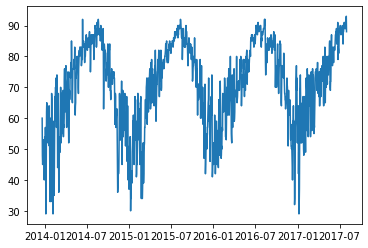

In [10]:
plt.plot(df ['Date'], df ['TempAvgF'])
plt.show()

In [11]:
new_column = df[['Date', 'TempAvgF']] 
new_column.dropna(inplace=True)
new_column.columns = ['ds', 'y'] 
new_column.tail()

WARNING - (py.warnings._showwarnmsg) - <ipython-input-11-b96f6c3ab795>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_column.dropna(inplace=True)



,ds,y
1314,2017-07-27,89
1315,2017-07-28,91
1316,2017-07-29,92
1317,2017-07-30,93
1318,2017-07-31,88


In [13]:
n = NeuralProphet()


In [19]:
model = n.fit(new_column, freq='D')

ERROR - (NP.forecaster.fit) - Model has already been fitted. Re-fitting may break or produce different results.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.924% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


TypeError: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'

In [16]:
future = n.make_future_dataframe(new_column, periods=1500)
forecast = n.predict(future)
forecast.tail()

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.924% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.933% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.933% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


,ds,y,yhat1,residual1,trend,season_yearly,season_weekly
1495,2021-09-04,None,79.602203,NaN,67.951859,12.077930,-0.427586
1496,2021-09-05,None,79.366180,NaN,67.948395,11.863545,-0.445753
1497,2021-09-06,None,79.746437,NaN,67.944931,11.650734,0.150777
1498,2021-09-07,None,79.881454,NaN,67.941467,11.440091,0.499899
1499,2021-09-08,None,79.324020,NaN,67.937996,11.232170,0.153855


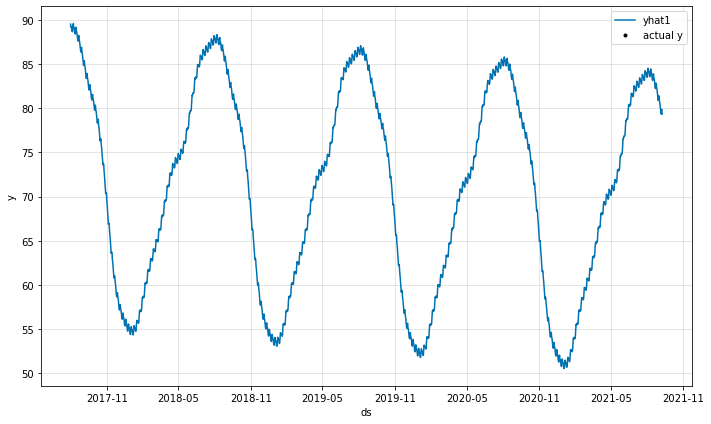

In [17]:
plot = n.plot(forecast)

In [1]:
df.corr()

NameError: name 'df' is not defined

In [2]:
new_column

NameError: name 'new_column' is not defined